# Exemplary study of tracking an individual user  
## (who has given informed consent)

## Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import FormatStrFormatter
import math
import sys
import os.path
print("Numpy version: {}".format(np.__version__))
print("Python version: {}".format(sys.version))
%matplotlib inline

Numpy version: 1.12.1
Python version: 3.6.1 (default, Apr  4 2017, 09:40:51) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]


## Anonymize files

This cell can only be run with access to the sensitive raw data (which a reproducer typically would not have).
It is included for a proper documentation of the anonymization process itself.

The anonymization in this case adds a random offset to the first column in the CSV (day of year).

In [2]:
%%bash
sha512sum -c raw.ts.sha512 # check that raw files have correct sha sums
./user_anon_timestamps.sh # anaonymize raw files 

user.csv.desk.ts: OK
user.csv.vpn.ts: OK
user.csv.wifi.ts: OK


## Load and Plot Data

In [8]:
daytime = np.loadtxt("user.csv.ts.daytime.anon", delimiter=",")
daytime
day = daytime[:,0] - min(daytime[:,0]) - 0.22  # make day of year relative by subtracting minimum, with an offset for plotting
time = daytime[:,1] + (daytime[:,2] / float(60))
print(time)
print(day)

[  9.31666667  10.16666667  19.58333333  20.08333333  10.26666667  18.5
  18.5         11.5         11.51666667  10.91666667  10.91666667
  12.43333333  13.05         9.85         9.85         9.86666667
  13.78333333  13.78333333  15.01666667  16.8         17.33333333  17.35
  10.45        10.53333333  10.55      ]
[ -0.22   0.78   0.78   0.78   4.78   4.78   4.78   5.78   5.78   6.78
   6.78   6.78   6.78   7.78   7.78   7.78   7.78   7.78   7.78   7.78
   7.78   7.78  12.78  12.78  12.78]


In [9]:
daytimed = np.loadtxt("user.csv.desk.ts.anon", delimiter=",")
deskday = daytimed[:,0] - min(daytime[:,0]) - 0.22
desktime = daytimed[:,1]+ daytimed[:,2]/float(60)
print(desktime)
print(deskday)

[  9.31666667  10.16666667  19.58333333  20.08333333  18.5         18.5
  11.5         11.51666667  12.43333333  13.05         9.85         9.86666667
  17.33333333  17.35        10.53333333  10.55      ]
[ -0.22   0.78   0.78   0.78   4.78   4.78   5.78   5.78   6.78   6.78
   7.78   7.78   7.78   7.78  12.78  12.78]


In [10]:
daytimev = np.loadtxt("user.csv.vpn.ts.anon", delimiter=",")
print(daytimev)
vpnday = daytimev[0] - min(daytime[:,0])
vpntime = daytimev[1]+ daytimev[2]/float(60)
print(vpnday)
print(vpntime)

[  1.38250000e+04   1.00000000e+01   1.60000000e+01]
5.0
10.2666666667


In [11]:
daytimew = np.loadtxt("user.csv.wifi.ts.anon", delimiter=",")
wifiday = daytimew[:,0] - min(daytime[:,0]) + 0.22
wifitime = daytimew[:,1]+ daytimew[:,2]/float(60)
print(wifiday)
print(wifitime)

[  7.22   7.22   8.22   8.22   8.22   8.22   8.22  13.22]
[ 10.91666667  10.91666667   9.85        13.78333333  13.78333333
  15.01666667  16.8         10.45      ]


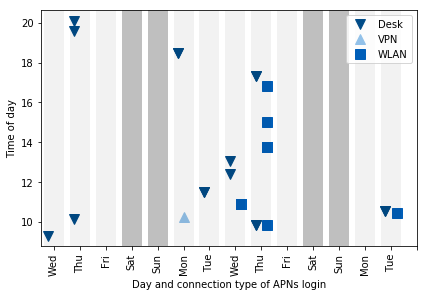

In [12]:
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
TUMOrange="##e87722"

ylabel = "Time of day"
xlabel = "Day and connection type of APNs login"

plt.plot(deskday, desktime, 'v',markersize=10,label="Desk",color=TUMDarkerBlue)
plt.plot(vpnday, vpntime, '^',markersize=10,label="VPN",color=TUMLighterBlue)
plt.plot(wifiday, wifitime, 'bs',markersize=10,label="WLAN",color=TUMBlue)
labels=["Wed", "Thu", "Fri", "Sat", "Sun", "Mon", "Tue", "Wed", "Thu","Fri", "Sat", "Sun","Mon","Tue"]
plt.legend(loc="upper right")
plt.xticks(range(0,15),labels, rotation='vertical')
ax=plt.gca();
ax.set_xlim(xmin=-0.5);
plt.ylabel(ylabel)
plt.xlabel(xlabel)
for i in range(0,len(labels)):
    if (labels[i] != "Sat") and (labels[i] != "Sun") :
        plt.axvline(i, ymax=1, linewidth=20, alpha=0.05, color='k') # vertical lines  
    if (labels[i] == "Sat") or (labels[i] == "Sun"):
        plt.axvline(i, ymax=1, linewidth=20, alpha=0.25, linestyle='-', color='k') # vertical lines          
plt.gcf().subplots_adjust(bottom=0.15,right=0.97,left=0.1,top=0.97)
#plt.savefig('userstudy.pdf', format='pdf', dpi=2000)    
plt.show()